In [ ]:
#白ピクセル数を数える

In [1]:
import os
import glob
import cv2
import matplotlib.pyplot as plt

In [3]:
folder_list = [
            # '/home/data/yolo_mask_crop/A',
            #   '/home/data/yolo_mask_crop/B',
              '/home/data/yolo_mask_crop/CD']

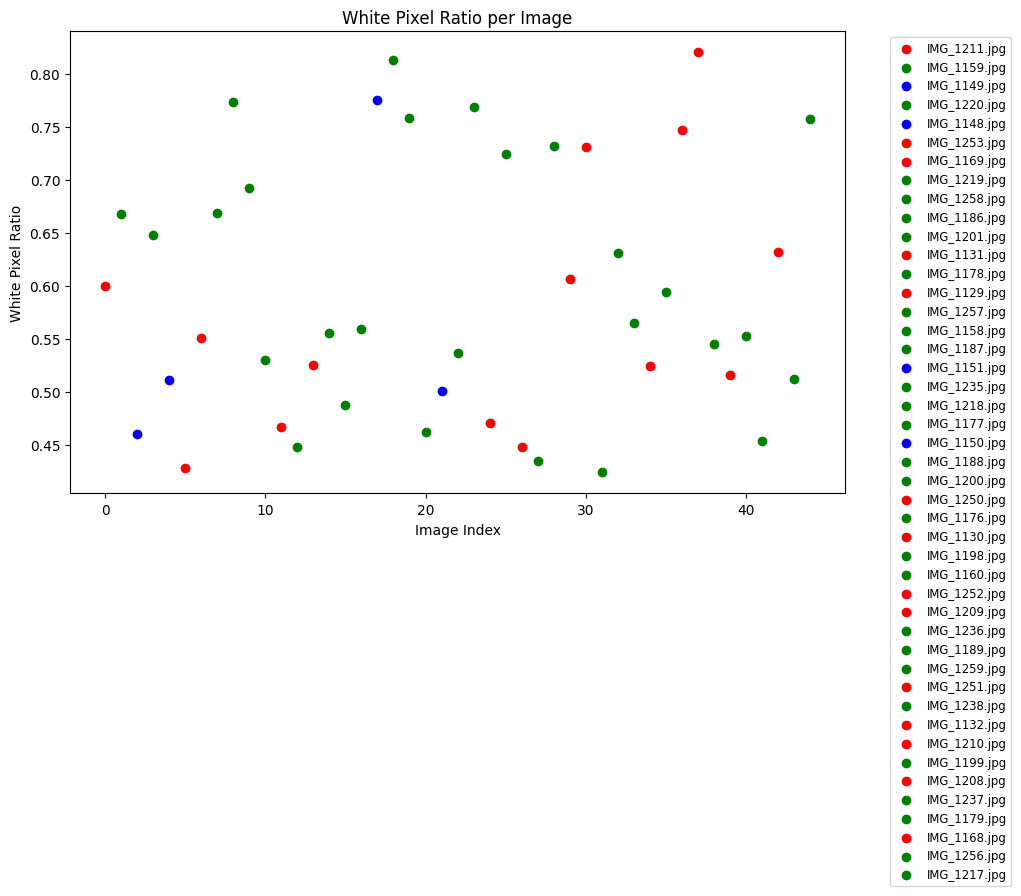

白ピクセルの割合が最も高いファイル: IMG_1210.jpg (82.02%)


In [12]:
import os
import glob
import cv2
import matplotlib.pyplot as plt

# 手動でファイル名と色の対応を指定
file_color_map = {
    #size
    'IMG_1129.jpg': 'r',
    'IMG_1130.jpg': 'r',
    'IMG_1131.jpg': 'r',    
    'IMG_1132.jpg': 'r',
    'IMG_1168.jpg': 'r',
    'IMG_1169.jpg': 'r', 
    'IMG_1208.jpg': 'r',
    'IMG_1209.jpg': 'r',
    'IMG_1210.jpg': 'r',
    'IMG_1211.jpg': 'r',
    'IMG_1250.jpg': 'r',
    'IMG_1251.jpg': 'r',
    'IMG_1252.jpg': 'r',
    'IMG_1253.jpg': 'r',
    #size & type
    'IMG_1148.jpg': 'b',   
    'IMG_1149.jpg': 'b',  
    'IMG_1150.jpg': 'b', 
    'IMG_1151.jpg': 'b', 
    #type
    'IMG_1158.jpg': 'g', 
    'IMG_1159.jpg': 'g', 
    'IMG_1160.jpg': 'g', 
    'IMG_1176.jpg': 'g', 
    'IMG_1177.jpg': 'g', 
    'IMG_1178.jpg': 'g', 
    'IMG_1179.jpg': 'g', 
    'IMG_1186.jpg': 'g', 
    'IMG_1187.jpg': 'g', 
    'IMG_1188.jpg': 'g', 
    'IMG_1189.jpg': 'g', 
    'IMG_1198.jpg': 'g', 
    'IMG_1199.jpg': 'g', 
    'IMG_1200.jpg': 'g', 
    'IMG_1201.jpg': 'g', 
    'IMG_1217.jpg': 'g', 
    'IMG_1218.jpg': 'g', 
    'IMG_1219.jpg': 'g', 
    'IMG_1220.jpg': 'g', 
    'IMG_1235.jpg': 'g', 
    'IMG_1236.jpg': 'g', 
    'IMG_1237.jpg': 'g', 
    'IMG_1238.jpg': 'g', 
    'IMG_1256.jpg': 'g', 
    'IMG_1257.jpg': 'g', 
    'IMG_1258.jpg': 'g', 
    'IMG_1259.jpg': 'g', 
}

# グラフの準備
plt.figure(figsize=(10, 6))

# 白ピクセルの割合が最も高いファイルを特定するための変数
max_ratio = -1
max_ratio_file = ""

# 各フォルダの処理
for folder in folder_list:
    white_pixel_ratios = []
    file_names = []

    # フォルダ内の画像ファイルを取得
    image_files = glob.glob(f"{folder}/*.jpg")

    for image_file in image_files:
        file_name = os.path.basename(image_file)

        # 画像を読み込む
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

        # 全ピクセル数を計算
        total_pixels = image.shape[0] * image.shape[1]

        # 白ピクセルの数を数える
        white_pixel_count = cv2.countNonZero(image)

        # 白ピクセルの割合を計算
        white_pixel_ratio = white_pixel_count / total_pixels
        white_pixel_ratios.append(white_pixel_ratio)
        file_names.append(file_name)

        # 最大の割合を持つファイルを更新
        if white_pixel_ratio > max_ratio:
            max_ratio = white_pixel_ratio
            max_ratio_file = file_name

    # 散布図にプロット（手動で指定した色を使用）
    for idx, (file_name, white_pixel_ratio) in enumerate(zip(file_names, white_pixel_ratios)):
        color = file_color_map.get(file_name, 'r')  # 指定されていないファイルはデフォルトで赤
        plt.scatter(idx, white_pixel_ratio, label=file_name, color=color)

# グラフの設定
plt.xlabel('Image Index')
plt.ylabel('White Pixel Ratio')
plt.title('White Pixel Ratio per Image')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

# 白ピクセルの割合が最も高いファイルを出力
print(f"白ピクセルの割合が最も高いファイル: {max_ratio_file} ({max_ratio:.2%})")